# Project Concrete Strength Prediction

### To predict the concrete strength using the data available in file concrete_data.xls.
### Apply feature engineering and model tuning to obtain 80% to 95% of R2score

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("concrete.csv")

# Univariate analysis

### data types and description of the independent attributes
### which should include (name, meaning, range of values observed, central values
### (mean and median), standard deviation and quartiles, analysis of the body of
### distributions / tails, missing values, outliers

In [4]:
df.shape

(1030, 9)

In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
df.apply(lambda column: (column == 0).sum())

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [10]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

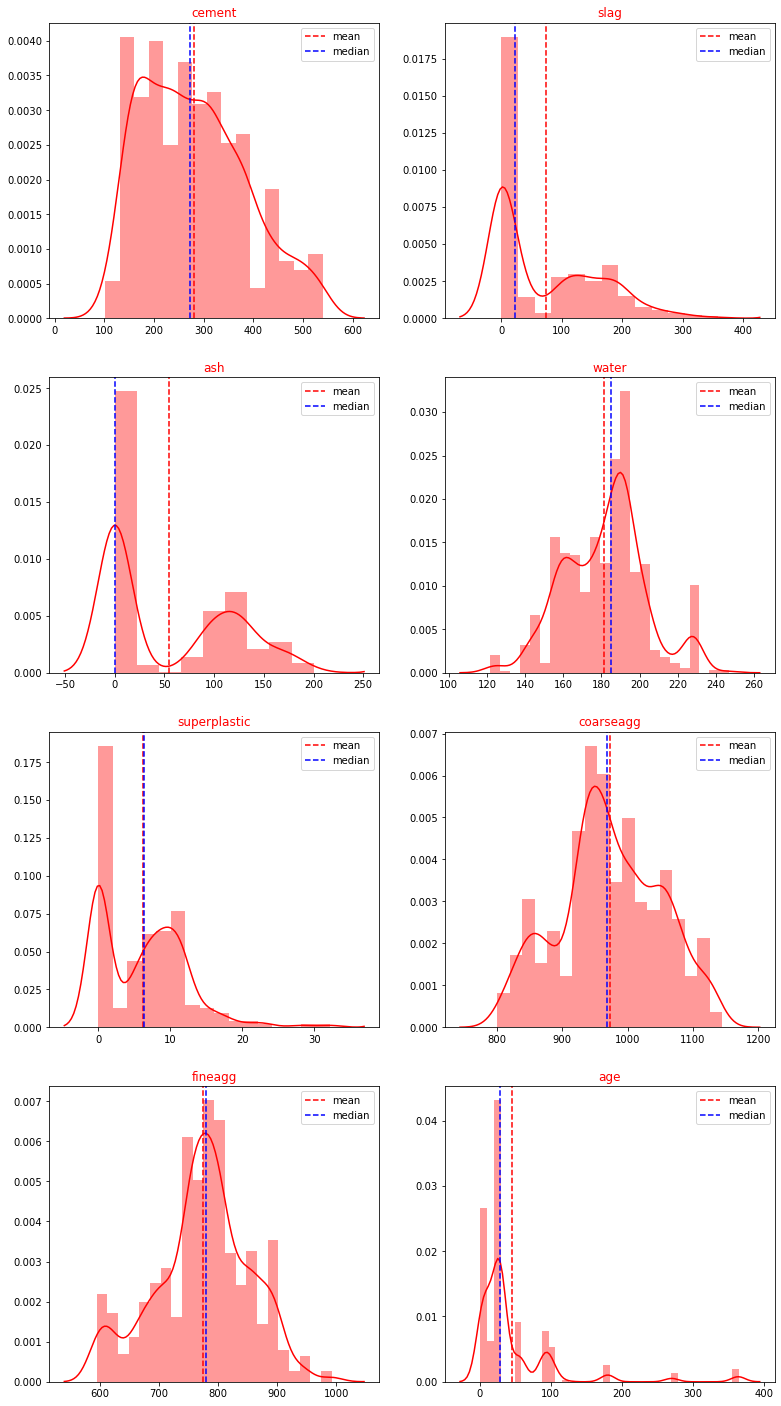

In [11]:
cols = [i for i in df.columns if i not in 'strength'] 
length = len(cols)
fig = plt.figure(figsize=(13,25))
for i, j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color="r")
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="r")
    plt.axvline(df[i].median(),linestyle="dashed",label="median",color="b")
    plt.legend(loc="best")
    plt.title(i,color="r")
    plt.xlabel("")

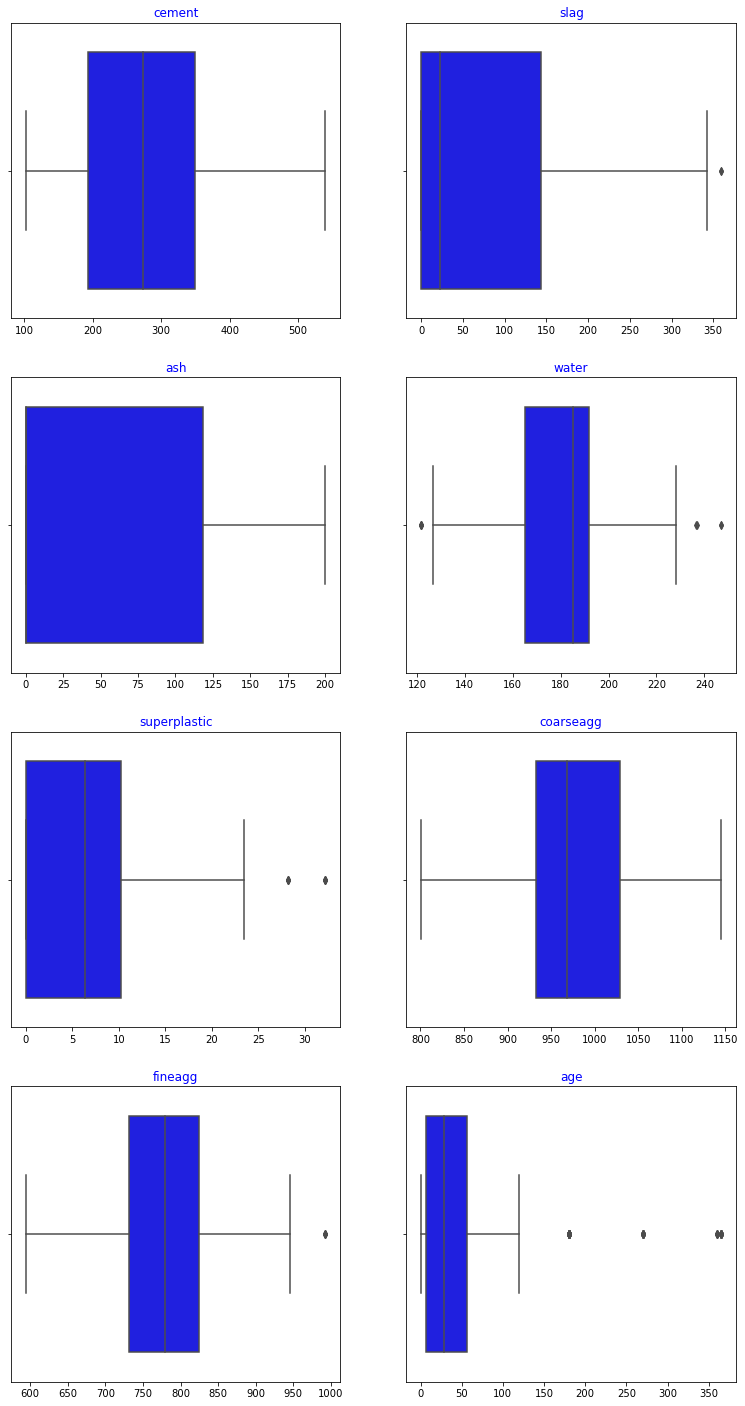

In [12]:
colsx = [i for i in df.columns if i not in 'strength']
lengthx = len(colsx)
figx = plt.figure(figsize=(13,25))
for i, j in itertools.zip_longest(colsx,range(lengthx)):
    plt.subplot(4, 2, j+1) 
    ax = sns.boxplot(df[i],color="b")
    ax.set_facecolor("w")
    plt.title(i,color="b")
    plt.xlabel("")
    

### 8 quantitative input variables, and 1 quantitative output variable
### strength is output variable, rest are input variables
### no missing values in any column
### 3 columns, slag, ash, superplastic have ZERO values
### right skewed - slag, superplastic, age
### moderatley skewed - cement, ash 
### variable ash has min, 1st quartile, median ZERO values, can use SimpleImputer and fill
### up with mean, but chose not to.

# Bivariate Analysis

### Bi-variate analysis between the predictor variables and between the predictor 
### variables and target column. Comment on your findings in terms of their 
### relationship and degree of relation if any. Visualize the analysis using boxplots and 
### pair plots, histograms or density curves
 

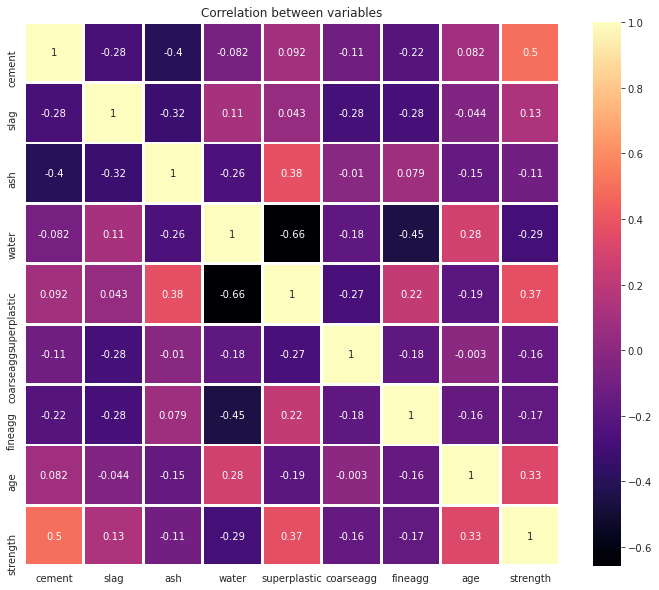

In [13]:
cor = df.corr()
plt.figure(figsize=(12,10))
with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,cmap="magma")
plt.title("Correlation between variables")
plt.show()

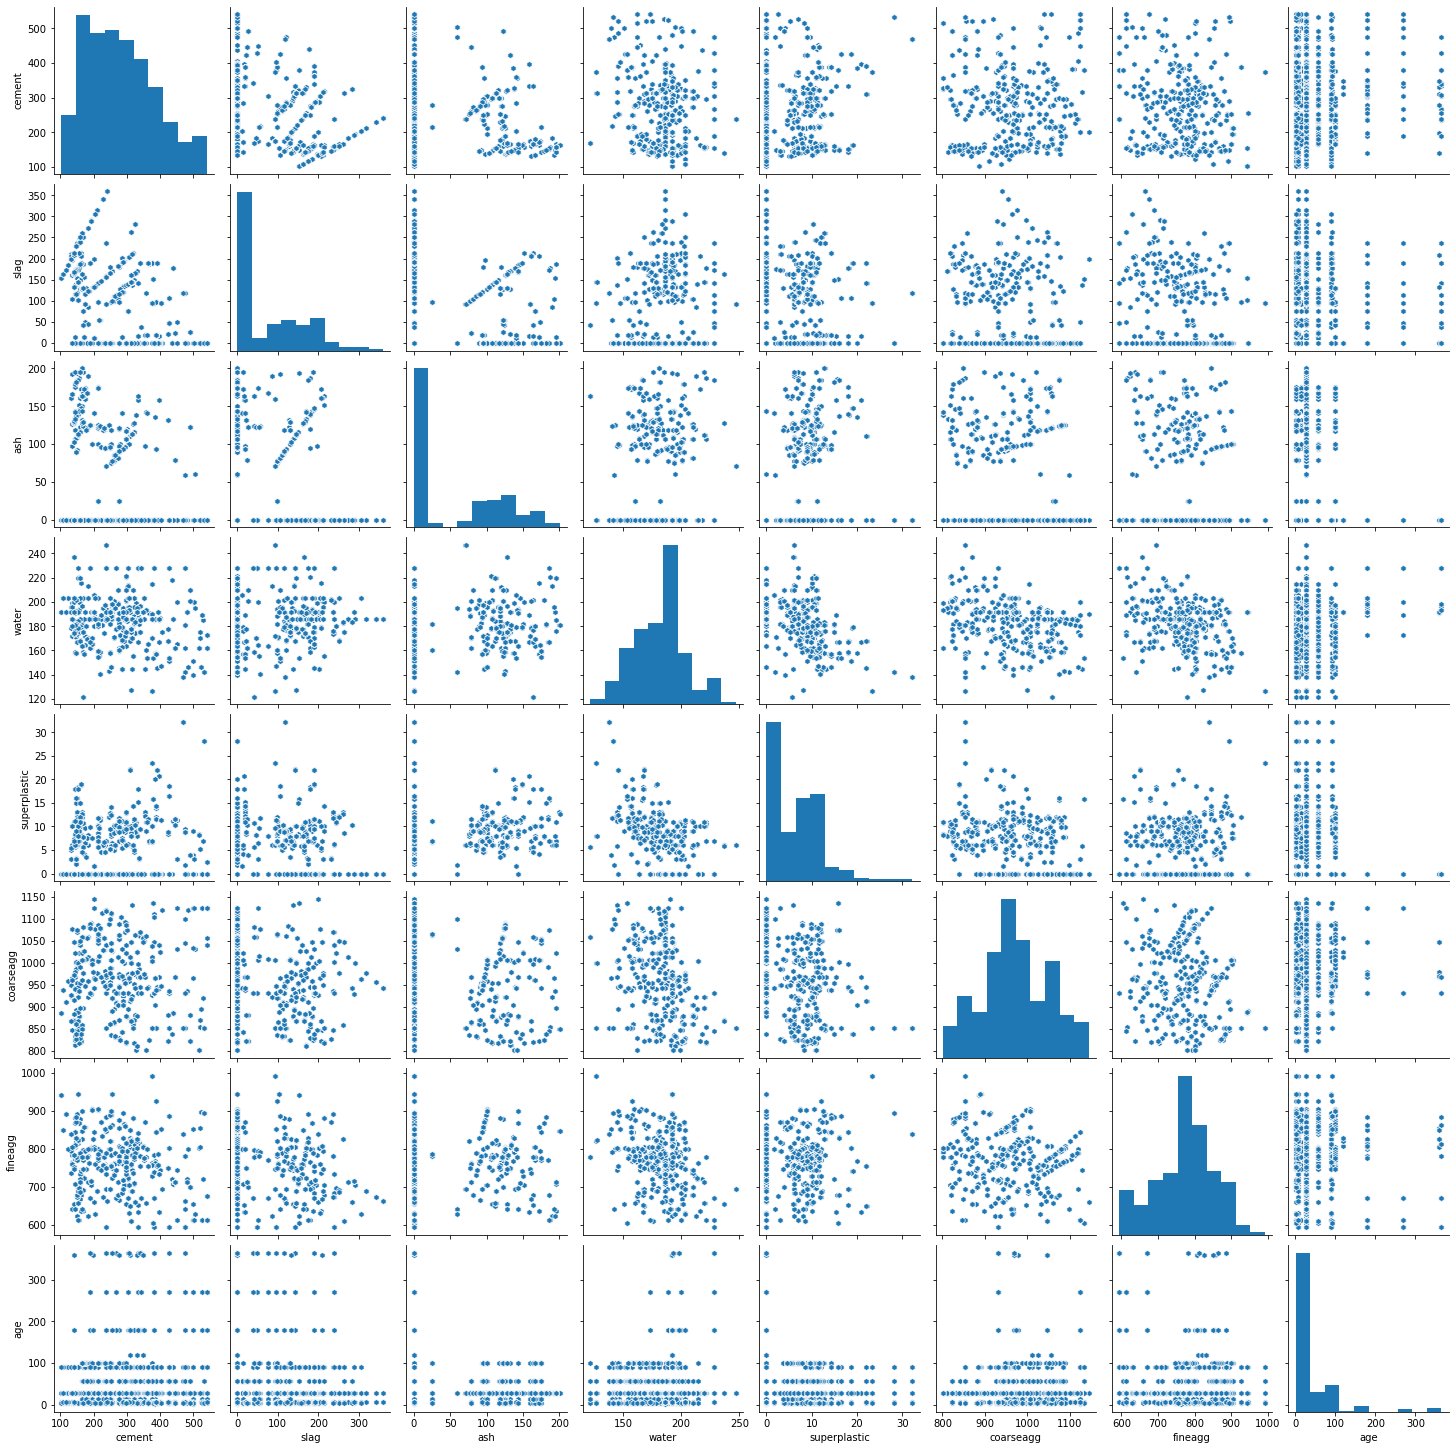

In [14]:
df_predictors_only = df.drop('strength', axis = 1)
sns.pairplot(df_predictors_only,markers="h")
plt.show()

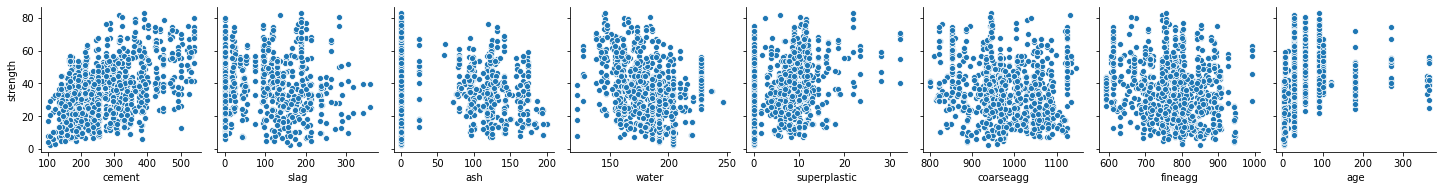

In [15]:
sns.pairplot(df, x_vars=cols,y_vars='strength',diag_kind=None)

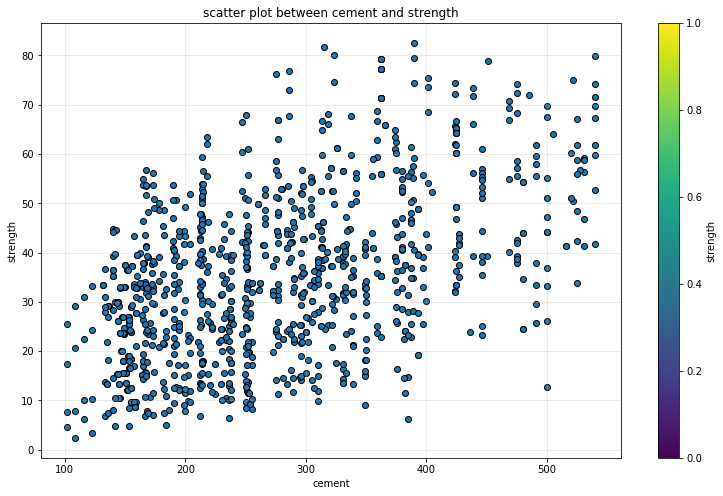

In [16]:
# Cement, Strength seem to have some correlation

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(x=df["cement"],y=df["strength"],
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("cement")
ax.set_ylabel("strength")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("scatter plot between cement and strength")
plt.grid(True,alpha=.3)
plt.show()


### Correlation between variables plotted
### Pairplot between predictors shown
### Pairplot between predictor variables and target variable (strength) shown
### Variable cement and target strength have some correlation

# Feature Engineering techniques  

### a. Identify opportunities (if any) to extract a new feature from existing features,           drop a feature (if required) 
### b. Get data model ready and do a train test split. 
### c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

### Look at relationships, distribution for a) above

In [17]:
def label(df):
    if df["age"] <= 30:
        return "1 mo"
    if df["age"] > 30 and df["age"] <= 60 :
        return "2 mos"
    if df["age"] > 60 and df["age"] <= 90 :
        return "3 mos"
    if df["age"] > 90 and df["age"] <= 120 :
        return "4 mos"
    if df["age"] > 120 and df["age"] <= 150 :
        return "5 mos"
    if df["age"] > 150 and df["age"] <= 180 :
        return "6 mos"
    if df["age"] > 180 and df["age"] <= 210 :
        return "7 mos"
    if df["age"] > 210 and df["age"] <= 240 :
        return "8 mos"
    if df["age"] > 240 and df["age"] <= 270 :
        return "9 mos"
    if df["age"] > 270 and df["age"] <= 300 :
        return "10 mos"
    if df["age"] > 300 and df["age"] <= 330 :
        return "11 mos"
    if df["age"] > 330 :
        return "12 mos"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

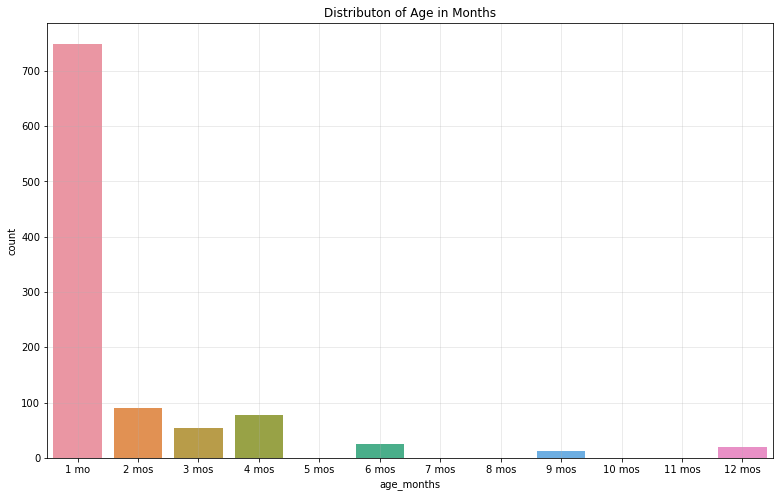

In [18]:
plt.figure(figsize=(13,8))
months = ['1 mo','2 mos', '3 mos','4 mos', '5 mos', '6 mos','7 mos',
          '8 mos', '9 mos', '10 mos', '11 mos', '12 mos']
ax = sns.countplot(df["age_months"], order=months)
plt.title("Distributon of Age in Months")
plt.grid(True, alpha=.3)
plt.show()

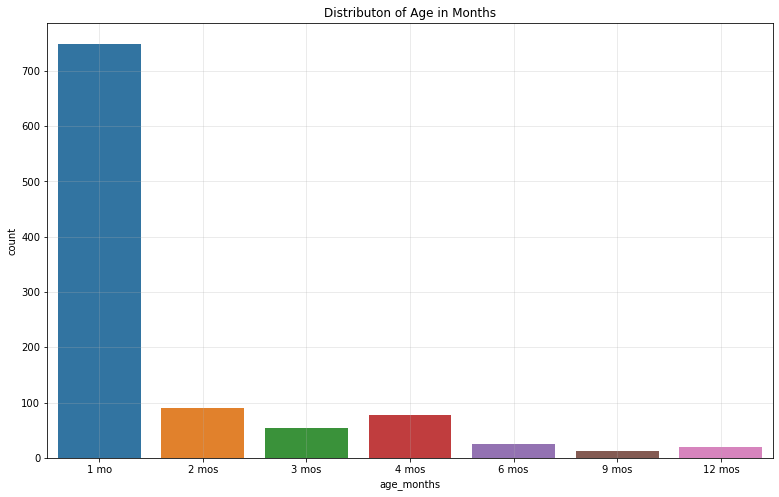

In [19]:
plt.figure(figsize=(13,8))
months = ['1 mo','2 mos', '3 mos','4 mos','6 mos', '9 mos',  '12 mos']
ax = sns.countplot(df["age_months"], order=months)
plt.title("Distributon of Age in Months")
plt.grid(True, alpha=.3)
plt.show()

In [20]:
df.drop('age_months', axis = 1, inplace = True)

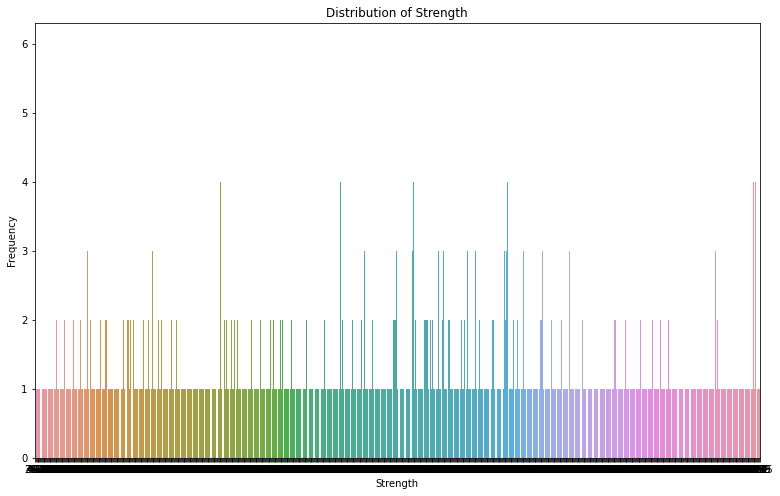

In [23]:
plt.figure(figsize=(13,8))
ax = sns.countplot(df["strength"])
plt.title('Distribution of Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

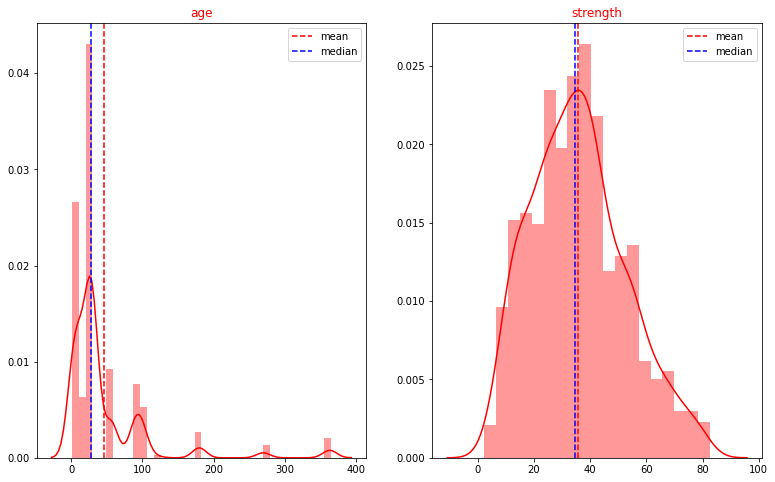

In [24]:
cols = [i for i in df.columns if i not in ('cement','slag','ash','water','superplastic','coarseagg','fineagg')] 
length = len(cols)
fig = plt.figure(figsize=(13,8))
for i, j in itertools.zip_longest(cols,range(length)):
    plt.subplot(1,2,j+1)
    ax = sns.distplot(df[i],color="r")
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="r")
    plt.axvline(df[i].median(),linestyle="dashed",label="median",color="b")
    plt.legend(loc="best")
    plt.title(i,color="r")
    plt.xlabel("")

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['strength'], axis = 1)
y = df[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

### a. If any new feature can be extracted from existing features, looks like superplastic and ash can be combined, but not combining and leaving them alone
###     looks like age and strength have somewhat similar distribution
### b. train test split done
### c. we will use LinearRegression,  DecisionTreeRegressor, RandomForestRegressor

# Creating the model and tuning it

### Algorithms that you think will be suitable for this project (at least 3 algorithms). 
### Use Kfold Cross Validation to evaluate model performance. Use appropriate 
### metrics and make a DataFrame to compare models w.r.t their metrics.


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [27]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)
y_pred=regressionModel.predict(X_test)
score1 = r2_score(y_test,y_pred)
print(score1)

0.6339136715208276


In [28]:
drModel = DecisionTreeRegressor()
drModel.fit(X_train, y_train)
y_pred=drModel.predict(X_test)
score2 = r2_score(y_test,y_pred)
print(score2)

0.8525787702010178


In [29]:
rfModel = RandomForestRegressor()
rfModel.fit(X_train, y_train)
y_pred=rfModel.predict(X_test)
score3 = r2_score(y_test,y_pred)
print(score3)

0.8914008946693556


In [30]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
regression_model = LinearRegression()
results = cross_val_score(regression_model, X, y, cv=kfold)
print(results)
print("Score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
score4 = results.mean()

[0.47614371 0.67567905 0.69840899 0.57072063 0.54738709 0.68539964
 0.59863602 0.61651603 0.50396964 0.54624389]
Score: 59.191% (7.308%)


In [31]:
dr_model = DecisionTreeRegressor()
results = cross_val_score(dr_model, X, y,cv=kfold)
print(results)
print("Score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
score5 = results.mean()

[0.81377359 0.85842861 0.93849736 0.8637737  0.79261724 0.90592879
 0.90633343 0.88112956 0.8469848  0.89156076]
Score: 86.990% (4.212%)


In [32]:
rf_model = RandomForestRegressor()
results = cross_val_score(rf_model, X, y,cv=kfold)
print(results)
print("Score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
score6 = results.mean()

[0.83346768 0.86967456 0.94653842 0.92756304 0.88627271 0.92676895
 0.92238869 0.91013133 0.91090571 0.8918391 ]
Score: 90.256% (3.147%)


### Techniques employed to squeeze that extra performance out of the model 
### without making it over fit. Use Grid Search or Random Search on any of the two 
### models used above. Make a DataFrame to compare models after hyperparameter 
### tuning and their metrics as above.

In [33]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 }


clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    4.6s finished


{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2}

In [35]:
dr = DecisionTreeRegressor(max_depth = 30, max_features = 'auto', min_samples_leaf = 2)

score7 = cross_val_score(dr, X, y, cv = 5).mean()

print(score7)

0.8419684489154111


In [36]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   20.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   26.2s finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [38]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 50,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


score8 = cross_val_score(rf, X, y, cv = 5).mean()


print(score8)

0.9071628792111082


In [39]:
data = {'Model' : ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Linear Regression CV',
                   'Decision Tree Regression CV', 'Random Forest Regression CV', 'Tuned Decision Tree Regression CV',
                   'Tuned Random Forest Regression CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7, score8] }

result = pd.DataFrame(data)
print(result)

                               Model     Score
0                  Linear Regression  0.633914
1           Decision Tree Regression  0.852579
2           Random Forest Regression  0.891401
3               Linear Regression CV  0.591910
4        Decision Tree Regression CV  0.869903
5        Random Forest Regression CV  0.902555
6  Tuned Decision Tree Regression CV  0.841968
7  Tuned Random Forest Regression CV  0.907163


## Tuned Random Forest Regression gives the best Score